### 4.2.1 自乗和誤差

$$
E = \frac{1}{2} \sum_k (y_k - t_k)^2
$$
$$
y_k: ニューラルネットの出力   t_k:教師データ
$$

In [2]:
import numpy as np

def mean_squared_error(y, t):
    return (np.sum((y-t)**2))/2
    

In [3]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

In [4]:
mean_squared_error(np.array(y),np.array(t))

0.097500000000000031

In [5]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.5,0.0] # これだと合計1になんない、大意に差はないが誤植？
mean_squared_error(np.array(y),np.array(t))

0.72250000000000003

### 4.2.2 交差エントロピー誤差

$$
E = - \sum_k t_k \log{y_k}
$$

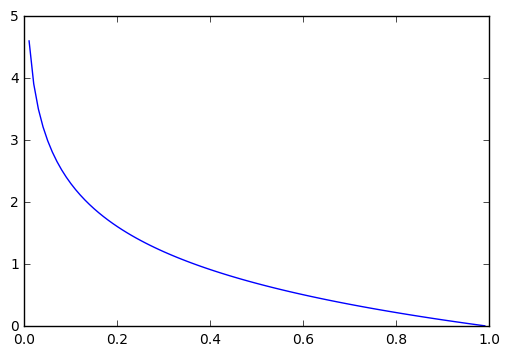

In [6]:
import matplotlib.pyplot as plt

x = np.arange(0.01,1,0.01)
y = - np.log(x)

plt.plot(x,y)
plt.show()

確率が極端に低いものを悪く評価する感じかな、

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return - (np.sum(t*np.log(y + delta)))

In [8]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))

0.51082545709933802

In [9]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.5,0.0] # これだと合計1になんない、大意に差はないが誤植？
cross_entropy_error(np.array(y),np.array(t))

2.3025840929945458

### 4.2.3 ミニバッチ学習

上の議論は一つのデータに対しての議論。N個のデータの場合、交差エントロピー誤差だと

$$
E = - \frac{1}{N} \sum_n \sum_k t_{nk} \log{y_{nk}}
\tag{4.3}　\\
t_{nk} はn番目のデータのk次元の正解ラベル
$$

これを全てのデータを対象に行うのは現実的ではない->少ないグループをサンプリングしそれで学習（ミニバッチ）

In [15]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import importlib
load_mnist = importlib.import_module('deep-learning-from-scratch.dataset.mnist').load_mnist # ハイフン付きのモジュール無理やり読み込む用

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


この中からランダムにチョイス

In [17]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch)
print(t_batch)

[50160 30964 51597 33722  5887  5214 10595 44586 12662 23670]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [28]:
y = np.array([1,2,3])
print(y)
print(y.ndim)

[1 2 3]
1


In [30]:
y = y.reshape(1,y.size)
print(y)
print(y.ndim)

[[1 2 3]]
2


In [31]:
y.shape

(1, 3)

In [32]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size) # yが一次元配列の時便宜的に二次元へ拡張（上参照）
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

    """
    # one_hotでtが与えられない時は
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
    """

In [52]:
t = np.array([2,7])
y = np.array([[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0],[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]])
# t = t.reshape(1, t.size)
print(t)
# y = y.reshape(1, y.size)
print(y)
batch_size = y.shape[0]
print(batch_size)
y[np.arange(batch_size),t] ## ?? 下でテスト

[2 7]
[[ 0.1   0.05  0.6   0.    0.05  0.1   0.    0.1   0.    0.  ]
 [ 0.1   0.05  0.6   0.    0.05  0.1   0.    0.1   0.    0.  ]]
2


array([ 0.6,  0.1])

In [61]:
a = np.array([[1,2,3],[4,5,6]])
a[np.array([1,1]), np.array([0,0])] # こういうスライシングができるのか・・・

array([4, 4])

認識率を指標にすると「あっているかーいないか」で結果が離散的な値になるためパラメータの調整が行えない（づらい、の方が正しいか）
損失関数により連続的な評価をすることでパラメータの調整を行いやすくする

## 4.3 数値微分

$$
f'(x) = \lim_{h\to0} \frac{f(x+h) - f (x)}{h}
\tag{4.4}
$$

これを真面目に実装すると丸め誤差（hを計算機で扱える以上に小さくしたりなど）、差分による誤差（真の微分とのズレ）などに左右されやすい
hを大きめの値にする（10^-4程度でいい結果が出ることが経験的にわかっている）、中心差分を取るなどの工夫で低減する

In [2]:
def numerical_diff(f,x):
    h = 1e-04
    return (f(x+h)-f(x-h))/(2*h)

In [3]:
def function_1(x):
    return 0.01*x**2 +0.1*x

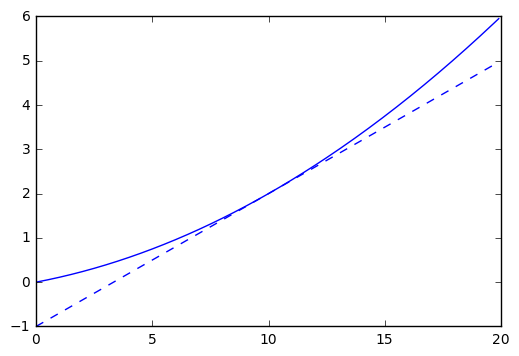

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
y_div = numerical_diff(function_1, 10) * (x - 10) + 2 # ホントに数式っぽく描けるね、numpy素晴らしい

plt.plot(x,y, color='blue')
plt.plot(x,y_div, '--', color='blue')
plt.show()

### 4.3.3 偏微分

In [12]:
def function_2(x):
    return x[0]**2 + x[1]**2 # またはnp.sum(x**2)

[[[-3.   -2.75 -2.5  ...,  2.25  2.5   2.75]
  [-3.   -2.75 -2.5  ...,  2.25  2.5   2.75]
  [-3.   -2.75 -2.5  ...,  2.25  2.5   2.75]
  ..., 
  [-3.   -2.75 -2.5  ...,  2.25  2.5   2.75]
  [-3.   -2.75 -2.5  ...,  2.25  2.5   2.75]
  [-3.   -2.75 -2.5  ...,  2.25  2.5   2.75]]

 [[-3.   -3.   -3.   ..., -3.   -3.   -3.  ]
  [-2.75 -2.75 -2.75 ..., -2.75 -2.75 -2.75]
  [-2.5  -2.5  -2.5  ..., -2.5  -2.5  -2.5 ]
  ..., 
  [ 2.25  2.25  2.25 ...,  2.25  2.25  2.25]
  [ 2.5   2.5   2.5  ...,  2.5   2.5   2.5 ]
  [ 2.75  2.75  2.75 ...,  2.75  2.75  2.75]]]


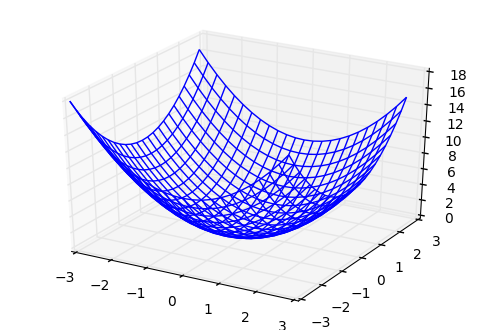

In [62]:
from mpl_toolkits.mplot3d import Axes3D
　
print(x)
y = function_2(x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # v1.0.0 からこちらのコール推奨(ただかっこ悪い気がする)
ax.plot_wireframe(x[0],x[1],y)

plt.show()

In [94]:
# meshgridの挙動
a = np.array([1,2])
b = np.array([1,2])
print(np.meshgrid(a,b))

a,b = np.meshgrid(a,b)
print(a)
a,b = a.flatten(),b.flatten() # リピートしている部分を結合する
print(a)

# 最終的に
print(a,b)

[array([[1, 2],
       [1, 2]]), array([[1, 1],
       [2, 2]])]
[[1 2]
 [1 2]]
[1 2 1 2]
[1 2 1 2] [1 1 2 2]


In [91]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.shape[0]): # 誤植かな、size -> shape[0]へ
        tmp_val = x[idx]
        # x + h の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # x - h の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val # 値を戻す
        
    return grad
        

In [88]:
numerical_gradient(function_2, np.array([3.0,3.0]))

array([ 6.,  6.])

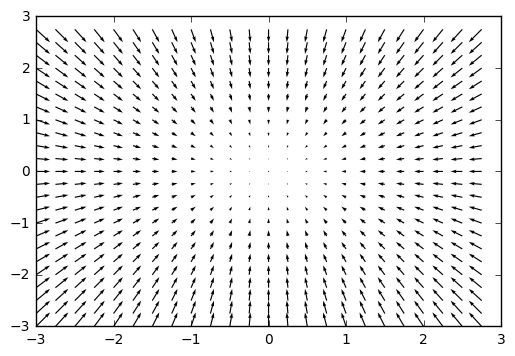

In [93]:
seq = np.arange(-3.0,3.0,0.25) 
x0, x1 = np.meshgrid(seq, seq)
x0, x1 = x0.flatten(), x1.flatten() # [1,2,3][1,2,3] -> [1,2,3,1,2,3]
x = np.array([x0, x1])

grad = - numerical_gradient(function_2, x)

plt.quiver(x[0], x[1], grad[0], grad[1])
plt.show()

### 4.3.1 勾配法

$$
x_0 = x_0 - \eta \frac{\partial f}{\partial x_0} \\
x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}
$$

ηは学習率（learning rate）、前もって設定する必要がある、チューニング対象（ハイパーパラメータ）

In [102]:
def gradient_decent(f, init_x, lr=0.01, step_num=100):
    x = np.copy(init_x) # 改訂
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [103]:
init_x = np.array([-3.0, 4.0])
print(gradient_decent(function_2, init_x, lr=0.1, step_num=100))
print(gradient_decent(function_2, init_x, lr=10, step_num=100))
print(gradient_decent(function_2, init_x, lr=1e-10, step_num=100))

[ -6.11110793e-10   8.14814391e-10]
[ -2.58983747e+13  -1.29524862e+12]
[-2.99999994  3.99999992]


勾配法を損失関数の改善に使うことができる
$$
  {\bf{W}} = \left(
    \begin{array}{ccc}
      w_{11} & w_{21} & w_{31} \\
      w_{21} & w_{22} & w_{32}
    \end{array}
  \right) \\
$$

$$
  \frac{\partial L}{\partial {\bf{W}}} = \left(
    \begin{array}{ccc}
      \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\
      \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{32}}
    \end{array}
  \right)
$$

In [116]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
# from common.functions import softmax, cross_entropy_error
# from common.gradient import numerical_gradient
import importlib
functions = importlib.import_module('deep-learning-from-scratch.common.functions')
softmax = functions.softmax
cross_entropy_error = functions.cross_entropy_error
gradient = importlib.import_module('deep-learning-from-scratch.common.gradient')
numerical_gradient = gradient.numerical_gradient # 上で実装したものだとうまく動かないよう（原因は未特定）

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # ガウス分布で初期化

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [117]:
net = simpleNet()
print(net.W)

[[-0.4277282   0.52610856  1.09384698]
 [-0.0940911  -1.10858533  0.8107079 ]]


In [118]:
x = np.array([0.6, 0.9])
p = net.predict(x) # ランダム生成したWで演算
print(p)

[-0.34131891 -0.68206166  1.3859453 ]


In [119]:
np.argmax(p) # 最大のP. ニューラルネットが判定した正解に相当

2

In [120]:
t = np.array([0,0,1]) # 正解ラベル（今回は2）
net.loss(x,t) # 損失関数の計算、これを減らすのが目的

0.26559566423122927

In [121]:
def f(W): # 損失関数（Lとでも命名した方がわかりやすいかもね
    return net.loss(x, t)

In [122]:
dW = numerical_gradient(f, net.W) # Wを少しずらしてできるfの偏微分行列を返却？のはず（自分で上で実装したものだと数値の並びが違うため動かない模様（多分
print(dW)

[[ 0.08178303  0.05816752 -0.13995055]
 [ 0.12267455  0.08725127 -0.20992582]]


（次のページに実装変更している旨記載あり、はよ言ってください）

いよいよ手動インポートめんどくさそうなので次の章からディレクトリ構成変更検討するか・・・？

In [141]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
# from common.functions import *
# from common.gradient import numerical_gradient
functions = importlib.import_module('deep-learning-from-scratch.common.functions')
cross_entropy_error = functions.cross_entropy_error
sigmoid = functions.sigmoid
softmax = functions.softmax
gradient = importlib.import_module('deep-learning-from-scratch.common.gradient')
numerical_gradient = gradient.numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [126]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [128]:
x = np.random.rand(100, 784)
y = net.predict(x)
print(x.shape)
print(y.shape)

(100, 784)
(100, 10)


In [136]:
t = np.random.rand(100, 10)
%time grads = net.numerical_gradient(x, t)

CPU times: user 3min 16s, sys: 1.86 s, total: 3min 18s
Wall time: 1min 39s


勾配計算には時間がかかる？微分だろうか？

In [135]:
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [139]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
# from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet
load_mnist = importlib.import_module('deep-learning-from-scratch.dataset.mnist').load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_loss_list = []

# ハイパーパラメータ
iters_num = 10  # 繰り返しの回数を適宜設定する
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    %time grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)


CPU times: user 1min 8s, sys: 728 ms, total: 1min 8s
Wall time: 34.4 s
CPU times: user 1min 8s, sys: 712 ms, total: 1min 8s
Wall time: 34.4 s
CPU times: user 1min 7s, sys: 772 ms, total: 1min 8s
Wall time: 34.3 s
CPU times: user 1min 8s, sys: 684 ms, total: 1min 8s
Wall time: 34.4 s
CPU times: user 1min 8s, sys: 708 ms, total: 1min 8s
Wall time: 34.4 s
CPU times: user 1min 7s, sys: 744 ms, total: 1min 8s
Wall time: 34.3 s
CPU times: user 1min 7s, sys: 676 ms, total: 1min 8s
Wall time: 34.3 s
CPU times: user 1min 7s, sys: 700 ms, total: 1min 8s
Wall time: 34.3 s
CPU times: user 1min 7s, sys: 796 ms, total: 1min 8s
Wall time: 34.2 s
CPU times: user 1min 7s, sys: 700 ms, total: 1min 8s
Wall time: 34.3 s


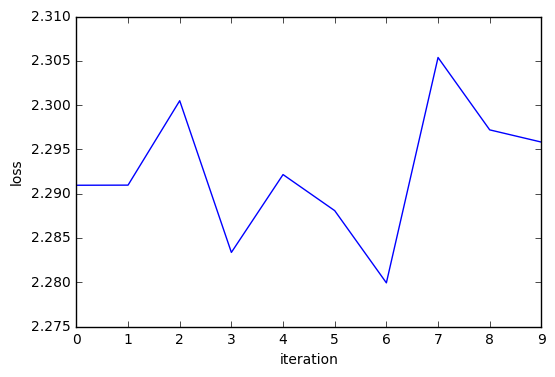

In [140]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

一回1分、10000回ループだと10000分か……7日？　実行中断、10回で
（dockerてCPUリソース制限あったっけ？なかったよね…）
意外とこれは前後していく感じかな

エポックはまあ、概念だけで次章以降で利用しよう。